#1) Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# 2)Problem Statement

BigMart, a leading retail chain, is seeking to optimize its sales by understanding the key factors that influence product sales at their stores. They have collected comprehensive sales data for 1559 products across 10 stores in different cities, along with various attributes associated with each product and store. The goal of this data science project is to develop a predictive model that accurately estimates the sales of each product at a specific store.

The predictive model will allow BigMart to identify and analyze the properties of products and stores that significantly impact sales. By gaining insights into these influential factors, BigMart aims to devise effective strategies and make data-driven decisions to enhance sales performance across their stores.

# 3)data description

**Item_Identifier**: A unique alphanumeric code or ID assigned to each item in the store.

**Item_Weight**: The weight of the item in metric units. It represents the physical weight of the product.

**Item_Fat_Content**: Categorical variable indicating the fat content level of the item. It can have categories like "Low Fat" or "Regular" to denote the fat content in the product.

**Item_Visibility**: A numerical value representing the percentage of total display area in the store allocated to the particular item. It indicates how prominently the item is displayed to the customers.

**Item_Type**: Categorical variable representing the category or type of the item. It could include categories such as "Dairy", "Bakery", "Frozen Foods", etc., to classify the items based on their nature.

**Item_MRP**: The Maximum Retail Price (MRP) of the item. It is the maximum price at which the item can be sold to the customers.

**Outlet_Identifier**: A unique identifier assigned to each outlet or store.

**Outlet_Establishment_Year**: The year in which the outlet was established. It indicates the age or duration of operation for the store.

**Outlet_Size**: Categorical variable representing the size or floor area of the outlet. It could have categories like "Small", "Medium", or "Large" to classify the store sizes.

**Outlet_Location_Type**: Categorical variable representing the type of location where the outlet is situated. It could have categories like "Urban", "Rural", or "Suburban" to classify the locations.

**Outlet_Type**: Categorical variable representing the type of outlet. It could include categories such as "Supermarket Type1", "Supermarket Type2", "Grocery Store", etc., to classify the outlet types.

**Item_Outlet_Sales**: The sales of the item at a specific outlet. It represents the target variable or the variable to be predicted in the dataset.

#4) quick overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#iporting datasets
df_train=pd.read_csv("/content/Train.csv")
df_test=pd.read_csv("/content/Test.csv")

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_test.shape

(5681, 11)

In [5]:
#stat information
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
df_train.drop_duplicates()
df_test.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


showing unique values in each feature

In [8]:
for i in df_train.columns:
  print(i)
  print(df_train[i].unique())
  print("-------------------------------")

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
-------------------------------
Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    1

In [9]:
for i in df_train.columns:
  print(i)
  print(df_train[i].value_counts())
  print("-------------------------------")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
-------------------------------
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
-------------------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-------------------------------
Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
-------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 91

there is an obvious problem with `Item_Fat_Content` feature as the same class has two names

In [10]:
df_train.replace(to_replace='LF', value='Low Fat', inplace=True)
df_train.replace(to_replace='low fat', value='Low Fat', inplace=True)
df_train.replace(to_replace='reg', value='Regular', inplace=True)
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
df_test.replace(to_replace='LF', value='Low Fat', inplace=True)
df_test.replace(to_replace='low fat', value='Low Fat', inplace=True)
df_test.replace(to_replace='reg', value='Regular', inplace=True)
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

searching for null values

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

dealing with nulls so we can make our data analysis .

All feature that are continous  we will replace them with the **mean**

In [13]:
# Replace null values with the mean
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)

catigorical ones with their **mode**

In [14]:
df_train["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].replace(to_replace=np.nan, value='Medium', inplace=True)

lets check

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

the same staff for test dataset

In [17]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
# Replace null values with the mean
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace=True)

In [19]:
df_test["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
df_test['Outlet_Size'].replace(to_replace=np.nan, value='Medium', inplace=True)

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#5) EDA

In [22]:
#concatinating datasets for data analysis
df = pd.concat([df_train, df_test], axis=0)
#shuffling the concatenated dataset
df = df.sample(frac=1, replace=False)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5042,FDG17,6.865000,Regular,0.035833,Frozen Foods,244.7486,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
3378,FDH38,6.425000,Low Fat,0.010438,Canned,115.8808,OUT046,1997,Small,Tier 1,Supermarket Type1,1757.712
2256,FDM04,12.695633,Regular,0.000000,Frozen Foods,50.6666,OUT019,1985,Small,Tier 1,Grocery Store,NaN
1392,FDY20,12.500000,Regular,0.082086,Fruits and Vegetables,92.2488,OUT018,2009,Medium,Tier 3,Supermarket Type2,1358.232
2743,FDV09,12.100000,Low Fat,0.020610,Snack Foods,149.8734,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN


In [23]:
df.shape

(14204, 12)

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5042,FDG17,6.865000,Regular,0.035833,Frozen Foods,244.7486,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
3378,FDH38,6.425000,Low Fat,0.010438,Canned,115.8808,OUT046,1997,Small,Tier 1,Supermarket Type1,1757.712
2256,FDM04,12.695633,Regular,0.000000,Frozen Foods,50.6666,OUT019,1985,Small,Tier 1,Grocery Store,NaN
1392,FDY20,12.500000,Regular,0.082086,Fruits and Vegetables,92.2488,OUT018,2009,Medium,Tier 3,Supermarket Type2,1358.232
2743,FDV09,12.100000,Low Fat,0.020610,Snack Foods,149.8734,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN


## questions to be answerd:


1)are the categorical features bised?

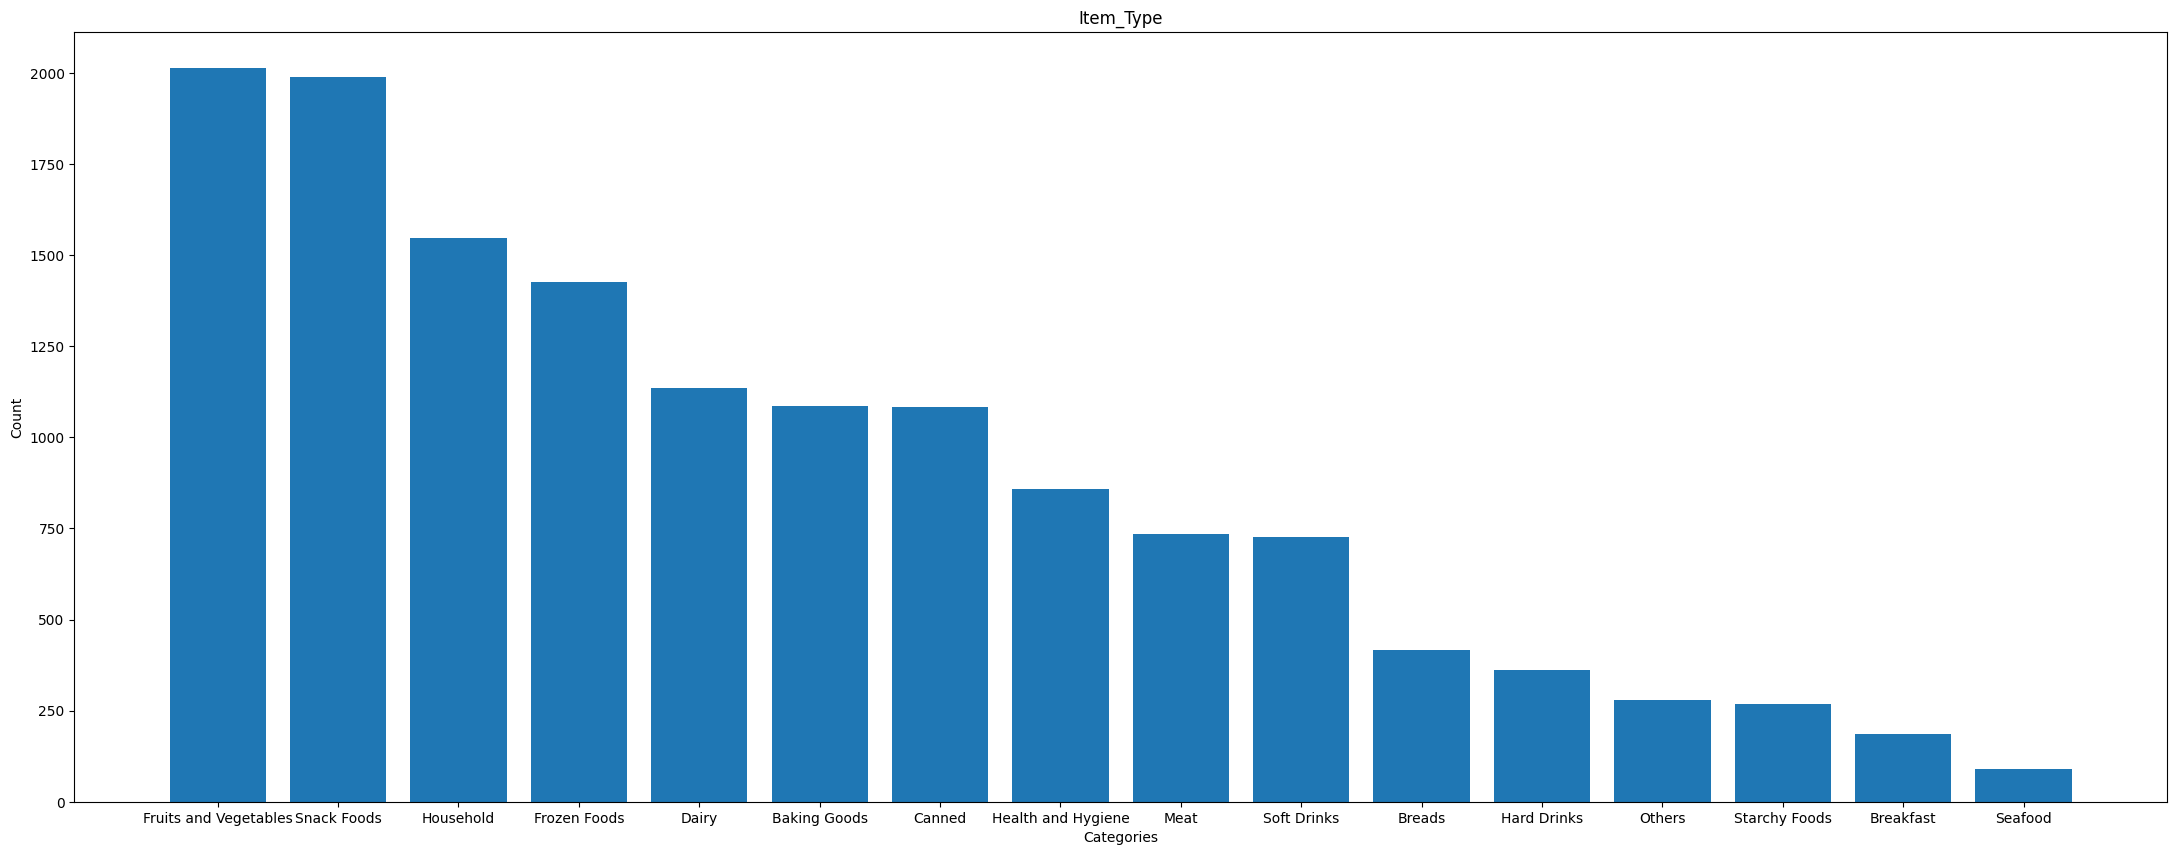

In [25]:
plt.figure(figsize=(27,10))
value_counts = df['Item_Type'].value_counts()

# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set the x-label and y-label
plt.xlabel('Categories')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Item_Type')

# Display the plot
plt.show()


In [26]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

it is somehow biased to (fruits and vegetables , snack foods)

**Note**:it doesnt mean it is the most selled type it is only the most repeated one in our data set

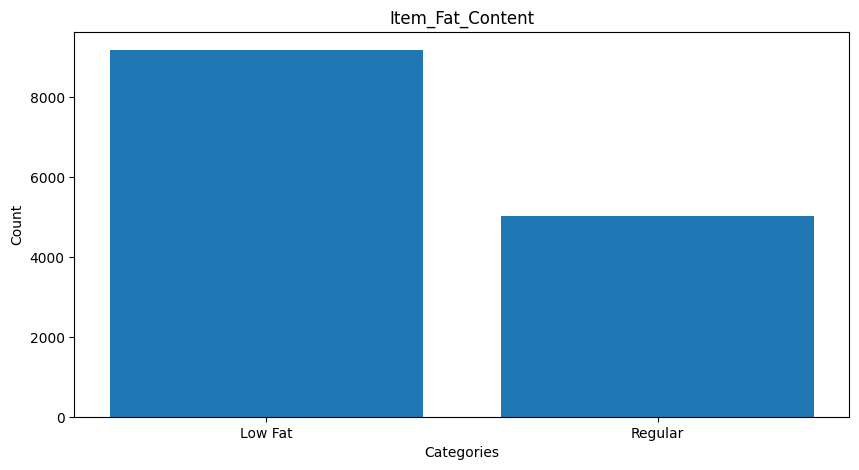

In [27]:
plt.figure(figsize=(10,5))
value_counts = df['Item_Fat_Content'].value_counts()

# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set the x-label and y-label
plt.xlabel('Categories')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Item_Fat_Content')

# Display the plot
plt.show()


In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

it is somehow biased to low fats

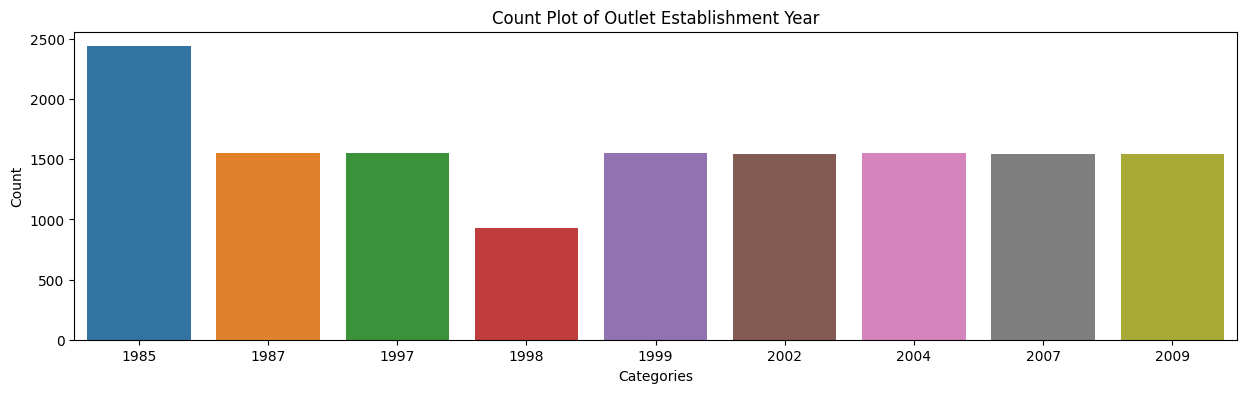

In [29]:
# Set the figure size
plt.figure(figsize=(15, 4))

# Create the count plot
sns.countplot(data=df, x='Outlet_Establishment_Year')

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot of Outlet Establishment Year')
plt.show()


In [30]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

exluding 1985 , it is not biased

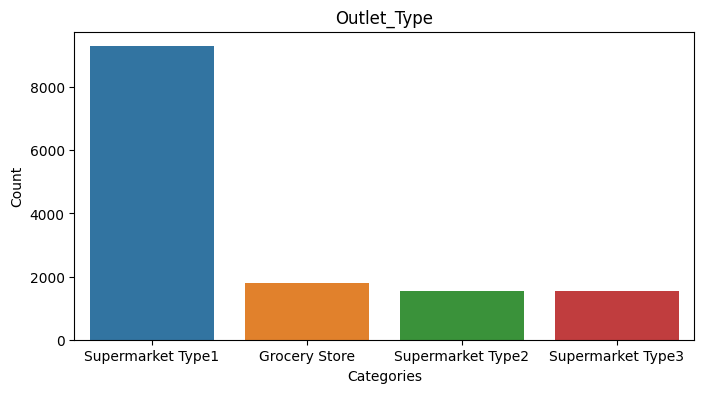

In [31]:
plt.figure(figsize=(8,4))
value_counts = df['Outlet_Type'].value_counts()

# Create a bar plot of the value counts
sns.countplot(data=df, x=df['Outlet_Type'])

# Set the x-label and y-label
plt.xlabel('Categories')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Outlet_Type')

# Display the plot
plt.show()


In [32]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

extremly biased towards supermarket 1

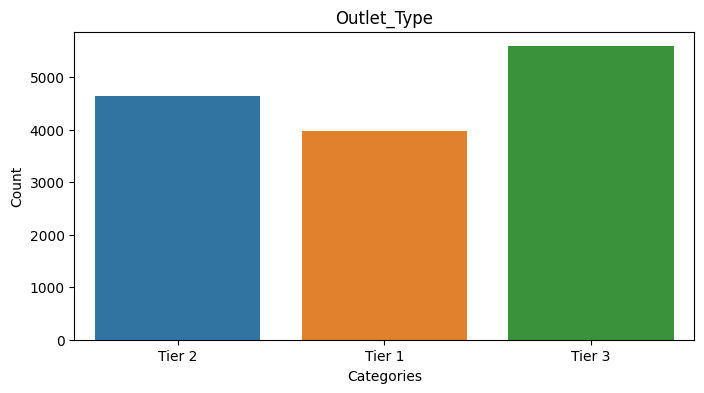

In [33]:
plt.figure(figsize=(8,4))
value_counts = df['Outlet_Location_Type'].value_counts()

# Create a bar plot of the value counts
sns.countplot(data=df, x=df['Outlet_Location_Type'])

# Set the x-label and y-label
plt.xlabel('Categories')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Outlet_Type')

# Display the plot
plt.show()

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

almost good distribution

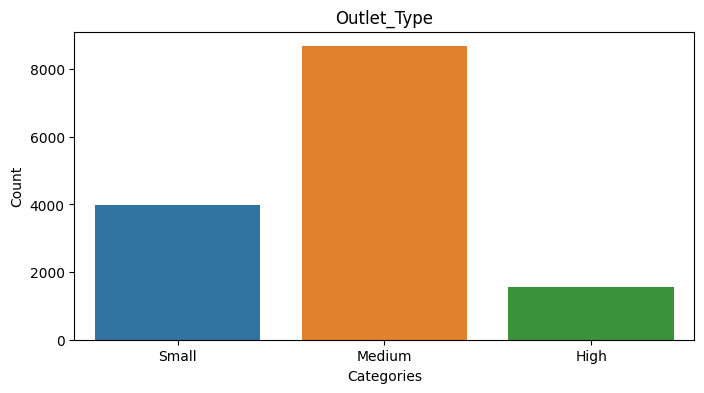

In [35]:
plt.figure(figsize=(8,4))
value_counts = df['Outlet_Size'].value_counts()

# Create a bar plot of the value counts
sns.countplot(data=df, x=df['Outlet_Size'])

# Set the x-label and y-label
plt.xlabel('Categories')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Outlet_Type')

# Display the plot
plt.show()

In [36]:
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

2)what is the distribution on continous features?

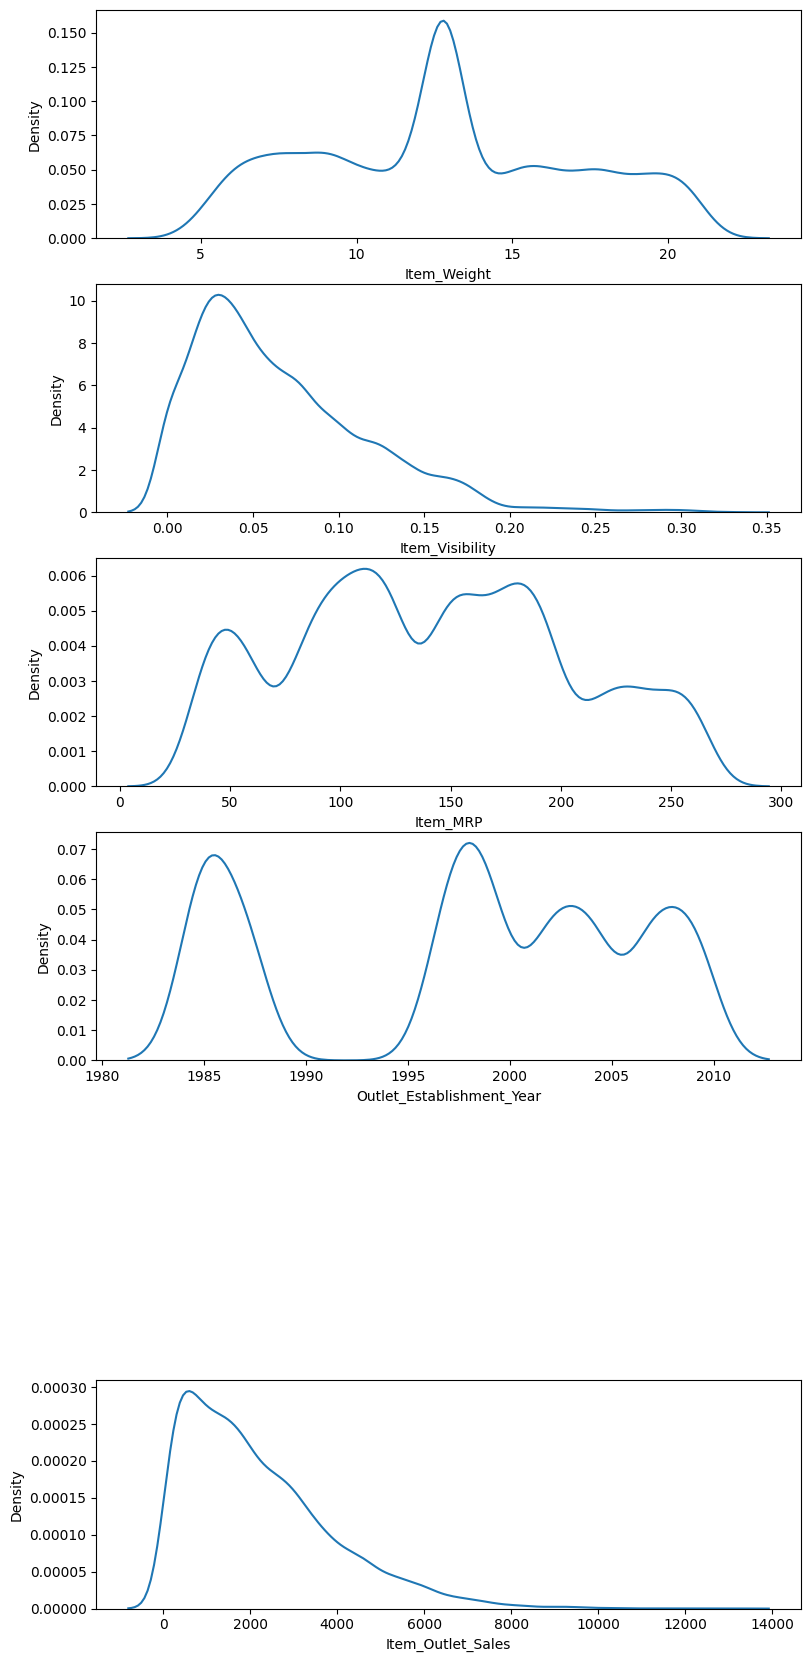

In [37]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

In [38]:
df.skew()

<ipython-input-38-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.111308
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

Item sales and item visibility are highly biased (wll be handled later)

#6) preprocessing

In [39]:
#droping unwanted features
df_train.drop("Item_Identifier",axis=1,inplace=True)
df_train.drop("Outlet_Identifier",axis=1,inplace=True)

df_test.drop("Item_Identifier",axis=1,inplace=True)
df_test.drop("Outlet_Identifier",axis=1,inplace=True)

## outliers

In [40]:
#lets cout them

Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).sum()

<ipython-input-40-f52728c0cbda>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_train.quantile(0.25)
<ipython-input-40-f52728c0cbda>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_train.quantile(0.75)
<ipython-input-40-f52728c0cbda>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).sum()


Item_Fat_Content               0
Item_MRP                       0
Item_Outlet_Sales            186
Item_Type                      0
Item_Visibility              144
Item_Weight                    0
Outlet_Establishment_Year      0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
dtype: int64

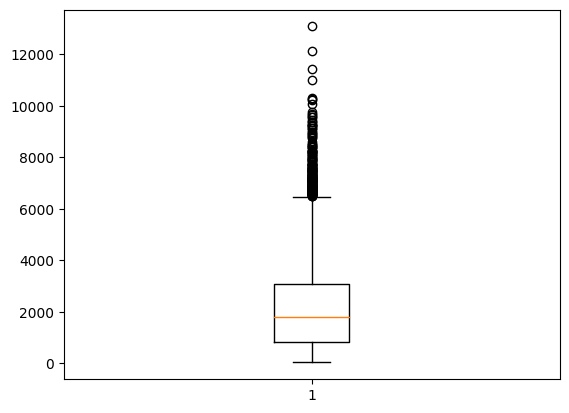

In [41]:
#box plot
fig, ax = plt.subplots()
ax.boxplot(df_train["Item_Outlet_Sales"])
plt.show()


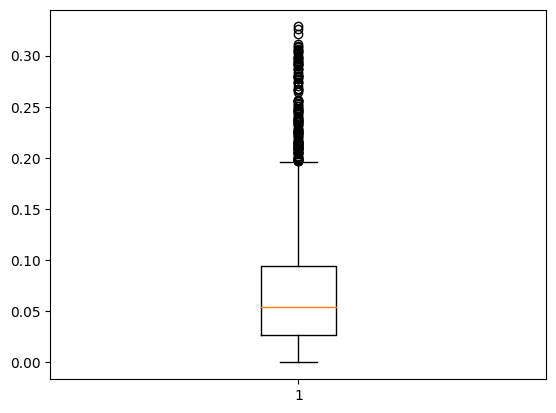

In [42]:
fig, ax = plt.subplots()
ax.boxplot(df_train["Item_Visibility"])
plt.show()

too far outliers

**we wont impute outliers because they have meaning:**

-we can have a very expensive product and also a very cheap one

-we can have a small object and a very big one

so, replacing outliers means faking the dataset

## skewness

ealing skewed features we found in our analysis with square root transformation

In [43]:
df_train['Outlet_Establishment_Year']=np.sqrt(df_train['Outlet_Establishment_Year'])
df_train['Item_Visibility']=np.sqrt(df_train['Item_Visibility'])
df_train['Item_Outlet_Sales']=np.sqrt(df_train['Item_Outlet_Sales'])

df_test['Outlet_Establishment_Year']=np.sqrt(df_test['Outlet_Establishment_Year'])
df_test['Item_Visibility']=np.sqrt(df_test['Item_Visibility'])


lest check**(optimal range is from [-0.5,0.5])**

In [44]:
df_train.skew()

<ipython-input-44-cfd128493051>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew()


Item_Weight                  0.090561
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.398642
Item_Outlet_Sales            0.234676
dtype: float64

In [45]:
df_test.skew()

<ipython-input-45-d57289115407>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.skew()


Item_Weight                  0.142813
Item_Visibility             -0.094941
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.398307
dtype: float64

## encoding

we have many features to encode but how to choose the way:

1)I chose `Item_Type` to be lable encoded as it has too many catigories.

2)At the oposite, the rest of the features wont add too many columns to our dataframe so, they are chosen to be one hot encoded

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_train['Item_Type'] = encoder.fit_transform(df_train['Item_Type'])
df_test['Item_Type'] = encoder.fit_transform(df_test['Item_Type'])

In [47]:
# Apply one-hot encoding using pd.get_dummies()
encoded_df = pd.get_dummies(df_train['Outlet_Type'], prefix="Outlet_Type")
df_train = pd.concat([df_train, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_train['Outlet_Location_Type'], prefix="Outlet_Location_Type")
df_train = pd.concat([df_train, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_train['Outlet_Size'], prefix="Outlet_Size")
df_train = pd.concat([df_train, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_train['Item_Fat_Content'], prefix="Item_Fat_Content")
df_train = pd.concat([df_train, encoded_df], axis=1)

# Display the encoded DataFrame
df_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,Low Fat,0.126678,4,249.8092,44.710178,Medium,Tier 1,Supermarket Type1,61.115775,...,0,0,1,0,0,0,1,0,1,0
1,5.92,Regular,0.138846,14,48.2692,44.821870,Medium,Tier 3,Supermarket Type2,21.057607,...,1,0,0,0,1,0,1,0,0,1
2,17.50,Low Fat,0.129461,10,141.6180,44.710178,Medium,Tier 1,Supermarket Type1,45.795961,...,0,0,1,0,0,0,1,0,1,0
3,19.20,Regular,0.000000,6,182.0950,44.698993,Medium,Tier 3,Grocery Store,27.062520,...,0,0,0,0,1,0,1,0,0,1
4,8.93,Low Fat,0.000000,9,53.8614,44.575778,High,Tier 3,Supermarket Type1,31.538947,...,0,0,0,0,1,1,0,0,1,0


In [48]:
# Apply one-hot encoding using pd.get_dummies()
encoded_df = pd.get_dummies(df_test['Outlet_Type'], prefix="Outlet_Type")
df_test = pd.concat([df_test, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_test['Outlet_Location_Type'], prefix="Outlet_Location_Type")
df_test = pd.concat([df_test, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_test['Outlet_Size'], prefix="Outlet_Size")
df_test = pd.concat([df_test, encoded_df], axis=1)
encoded_df = pd.get_dummies(df_test['Item_Fat_Content'], prefix="Item_Fat_Content")
df_test = pd.concat([df_test, encoded_df], axis=1)



In [49]:
df_train.shape

(8523, 22)

In [50]:
df_test.shape

(5681, 21)

In [51]:
#droping encoded features
df_train.drop("Item_Fat_Content",inplace=True,axis=1)
df_train.drop("Outlet_Size",inplace=True,axis=1)
df_train.drop("Outlet_Location_Type",inplace=True,axis=1)
df_train.drop("Outlet_Type",inplace=True,axis=1)

df_test.drop("Item_Fat_Content",inplace=True,axis=1)
df_test.drop("Outlet_Size",inplace=True,axis=1)
df_test.drop("Outlet_Location_Type",inplace=True,axis=1)
df_test.drop("Outlet_Type",inplace=True,axis=1)


In [52]:
df_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.126678,4,249.8092,44.710178,61.115775,0,1,0,0,1,0,0,0,1,0,1,0
1,5.92,0.138846,14,48.2692,44.821870,21.057607,0,0,1,0,0,0,1,0,1,0,0,1
2,17.50,0.129461,10,141.6180,44.710178,45.795961,0,1,0,0,1,0,0,0,1,0,1,0
3,19.20,0.000000,6,182.0950,44.698993,27.062520,1,0,0,0,0,0,1,0,1,0,0,1
4,8.93,0.000000,9,53.8614,44.575778,31.538947,0,1,0,0,0,0,1,1,0,0,1,0


In [53]:
df_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,20.750000,0.086976,13,107.8622,44.710178,0,1,0,0,1,0,0,0,1,0,1,0
1,8.300000,0.196030,4,87.3198,44.799554,0,1,0,0,0,1,0,0,1,0,0,1
2,14.600000,0.315555,11,241.7538,44.698993,1,0,0,0,0,0,1,0,1,0,1,0
3,7.315000,0.124050,13,155.0340,44.799554,0,1,0,0,0,1,0,0,1,0,1,0
4,12.695633,0.344383,4,234.2300,44.553339,0,0,0,1,0,0,1,0,1,0,0,1


## scaling

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

columns=df_train.columns
# Create an instance of the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data
df_train = scaler.fit_transform(df_train)

# Convert the scaled arrays back to DataFrames
df_train = pd.DataFrame(df_train, columns=columns)
#df_test = pd.DataFrame(df_test, columns=df_test.columns)

# Display the scaled training data DataFrame
df_train.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0.282525,0.221058,0.266667,0.927507,0.584063,0.509498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081274,0.242291,0.933333,0.072068,1.000000,0.140735,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.770765,0.225914,0.666667,0.468288,0.584063,0.368469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.871986,0.000000,0.400000,0.640093,0.542412,0.196015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.260494,0.000000,0.600000,0.095805,0.083563,0.237223,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [55]:
df_train.shape

(8523, 18)

In [56]:
#check for duplicates that results from scaling
df_train.drop_duplicates()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0.282525,0.221058,0.266667,0.927507,0.584063,0.509498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081274,0.242291,0.933333,0.072068,1.000000,0.140735,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.770765,0.225914,0.666667,0.468288,0.584063,0.368469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.871986,0.000000,0.400000,0.640093,0.542412,0.196015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.260494,0.000000,0.600000,0.095805,0.083563,0.237223,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.415829,0.866667,0.777729,0.083563,0.432121,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8519,0.227746,0.378244,0.000000,0.326263,0.708953,0.162638,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8520,0.359929,0.327334,0.533333,0.228492,0.792161,0.264863,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8521,0.158083,0.664995,0.866667,0.304939,1.000000,0.342366,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [57]:
df_train.shape

(8523, 18)

no duplicates

## coorelation

<ipython-input-58-9194ed713784>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


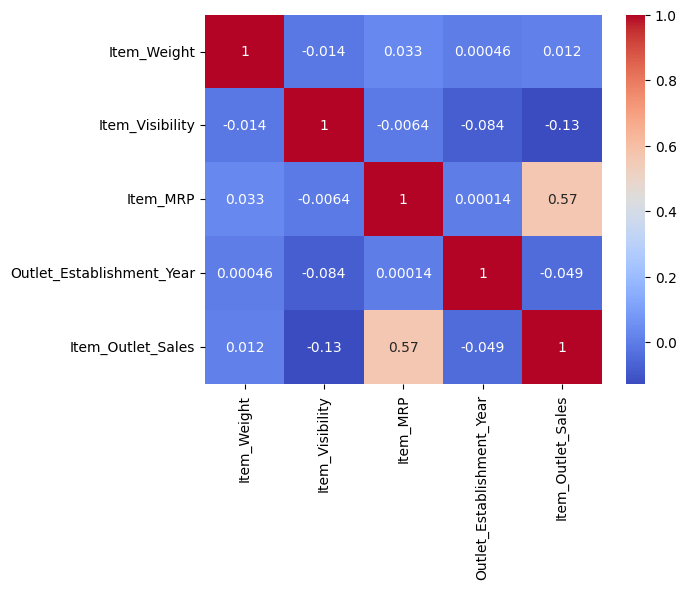

In [58]:
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


very weak values

## feature selection

In [59]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

In [60]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=80)
X=df_train.drop("Item_Outlet_Sales",axis=1)
y=df_train['Item_Outlet_Sales']
X = FeatureSelection.fit_transform(X, y)

In [61]:
#showing X Dimension
print('X Shape is ' , X.shape)
for i in range (len(df.columns)-1):
     print(df.columns[i] , FeatureSelection.get_support()[i])


X Shape is  (8523, 13)
Item_Identifier True
Item_Weight True
Item_Fat_Content True
Item_Visibility True
Item_Type True
Item_MRP True
Outlet_Identifier True
Outlet_Establishment_Year False
Outlet_Size True
Outlet_Location_Type True
Outlet_Type True


it suggests to drop (Outlet_Establishment_Year) feature

In [62]:
df_train.drop("Outlet_Establishment_Year",axis=1,inplace=True)
df_test.drop("Outlet_Establishment_Year",axis=1,inplace=True)

#7)modeling

In [63]:
df=df_train

In [64]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0.282525,0.221058,0.266667,0.927507,0.509498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081274,0.242291,0.933333,0.072068,0.140735,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.770765,0.225914,0.666667,0.468288,0.368469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.871986,0.000000,0.400000,0.640093,0.196015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.260494,0.000000,0.600000,0.095805,0.237223,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## linear regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare your data
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [66]:
print("mse",mse)
print("r2",r2)

mse 0.009195447101423122
r2 0.6698243996178753


## Regularized Linear Regression

In [67]:
from sklearn.linear_model import Lasso, Ridge

# Create an instance of Lasso Regression
lasso_model = Lasso(alpha=1.0)
# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)
# Make predictions on the test data using Lasso
lasso_y_pred = lasso_model.predict(X_test)
# Evaluate Lasso model's performance
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Create an instance of Ridge Regression
ridge_model = Ridge(alpha=1.0)
# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)
# Make predictions on the test data using Ridge
ridge_y_pred = ridge_model.predict(X_test)
# Evaluate Ridge model's performance
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)


In [68]:
print("ridge_r2",ridge_r2)
print("ridge_mse",ridge_mse)
print("----------------------")
print("lasso_r2",lasso_r2)
print("lasso_mse",lasso_mse)

ridge_r2 0.6698239364318967
ridge_mse 0.009195460001232069
----------------------
lasso_r2 -0.0037898882324851613
lasso_mse 0.027955720554464582


## RandomForest

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)
# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test data using Random Forest
rf_y_pred = rf_model.predict(X_test)
# Evaluate Random Forest model's performance
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [70]:
print("rf_mse",rf_mse)
print("rf_r2",rf_r2)

rf_mse 0.009807291597100498
rf_r2 0.6478552532052435


## XGBoost

In [71]:
from xgboost import XGBRegressor

# Create an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)
# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test data using XGBoost
xgb_y_pred = xgb_model.predict(X_test)
# Evaluate XGBoost model's performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

In [72]:
print("xgb_mse",xgb_mse)
print("xgb_r2",xgb_r2)

xgb_mse 0.010035380839895936
xgb_r2 0.6396653846920493


# 8)summary

In [73]:
mses=[mse,lasso_mse,ridge_mse,xgb_mse,rf_mse]
acc=[r2,lasso_r2,ridge_r2,xgb_r2,rf_r2]
lables=["LR","lasso","ridge","xgb","rf"]


In [74]:
model_name=["lr","lasso","ridge","xgb","rf"]

accuracy = [r2,lasso_r2,ridge_r2,xgb_r2,rf_r2]

# Create the dataframe
acc_df = pd.DataFrame({'accuracy': accuracy},index=model_name)

acc_df


,accuracy
lr,0.669824
lasso,-0.003790
ridge,0.669824
xgb,0.639665
rf,0.647855


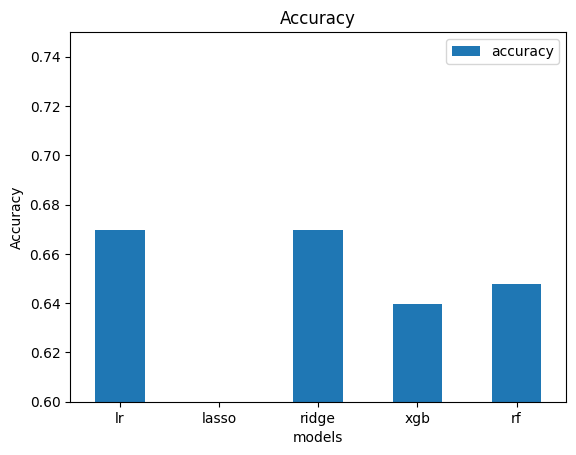

In [75]:
# Plot the bar chart
acc_df.plot(kind='bar',rot=0)
plt.ylim(0.60, 0.75)
plt.xlabel('models')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()